In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
# import our data
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv", dtype='category')
print(df)

    age anaemia creatinine_phosphokinase diabetes ejection_fraction  \
0    75       0                      582        0                20   
1    55       0                     7861        0                38   
2    65       0                      146        0                20   
3    50       1                      111        0                20   
4    65       1                      160        1                20   
..   ..     ...                      ...      ...               ...   
294  62       0                       61        1                38   
295  55       0                     1820        0                38   
296  45       0                     2060        1                60   
297  45       0                     2413        0                38   
298  50       0                      196        0                45   

    high_blood_pressure  platelets serum_creatinine serum_sodium sex smoking  \
0                     1     265000              1.9          130   

In [3]:
#df2 = pd.DataFrame([df.iloc[:, i].cat.codes for i in range(df.shape[1])]).T
#print(df2)
#selected = 'age', 'ejection_fraction', 'serum_creatinine', 'time'
df2 = df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
print(df2)

    age ejection_fraction serum_creatinine time
0    75                20              1.9    4
1    55                38              1.1    6
2    65                20              1.3    7
3    50                20              1.9    7
4    65                20              2.7    8
..   ..               ...              ...  ...
294  62                38              1.1  270
295  55                38              1.2  271
296  45                60              0.8  278
297  45                38              1.4  280
298  50                45              1.6  285

[299 rows x 4 columns]


In [4]:
# important features - age, ejection fraciton, serum creatinine, time (0.25 or higher correlation)
# set up X and y and split training/testing data
X = df2
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# set up and fit tree to training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

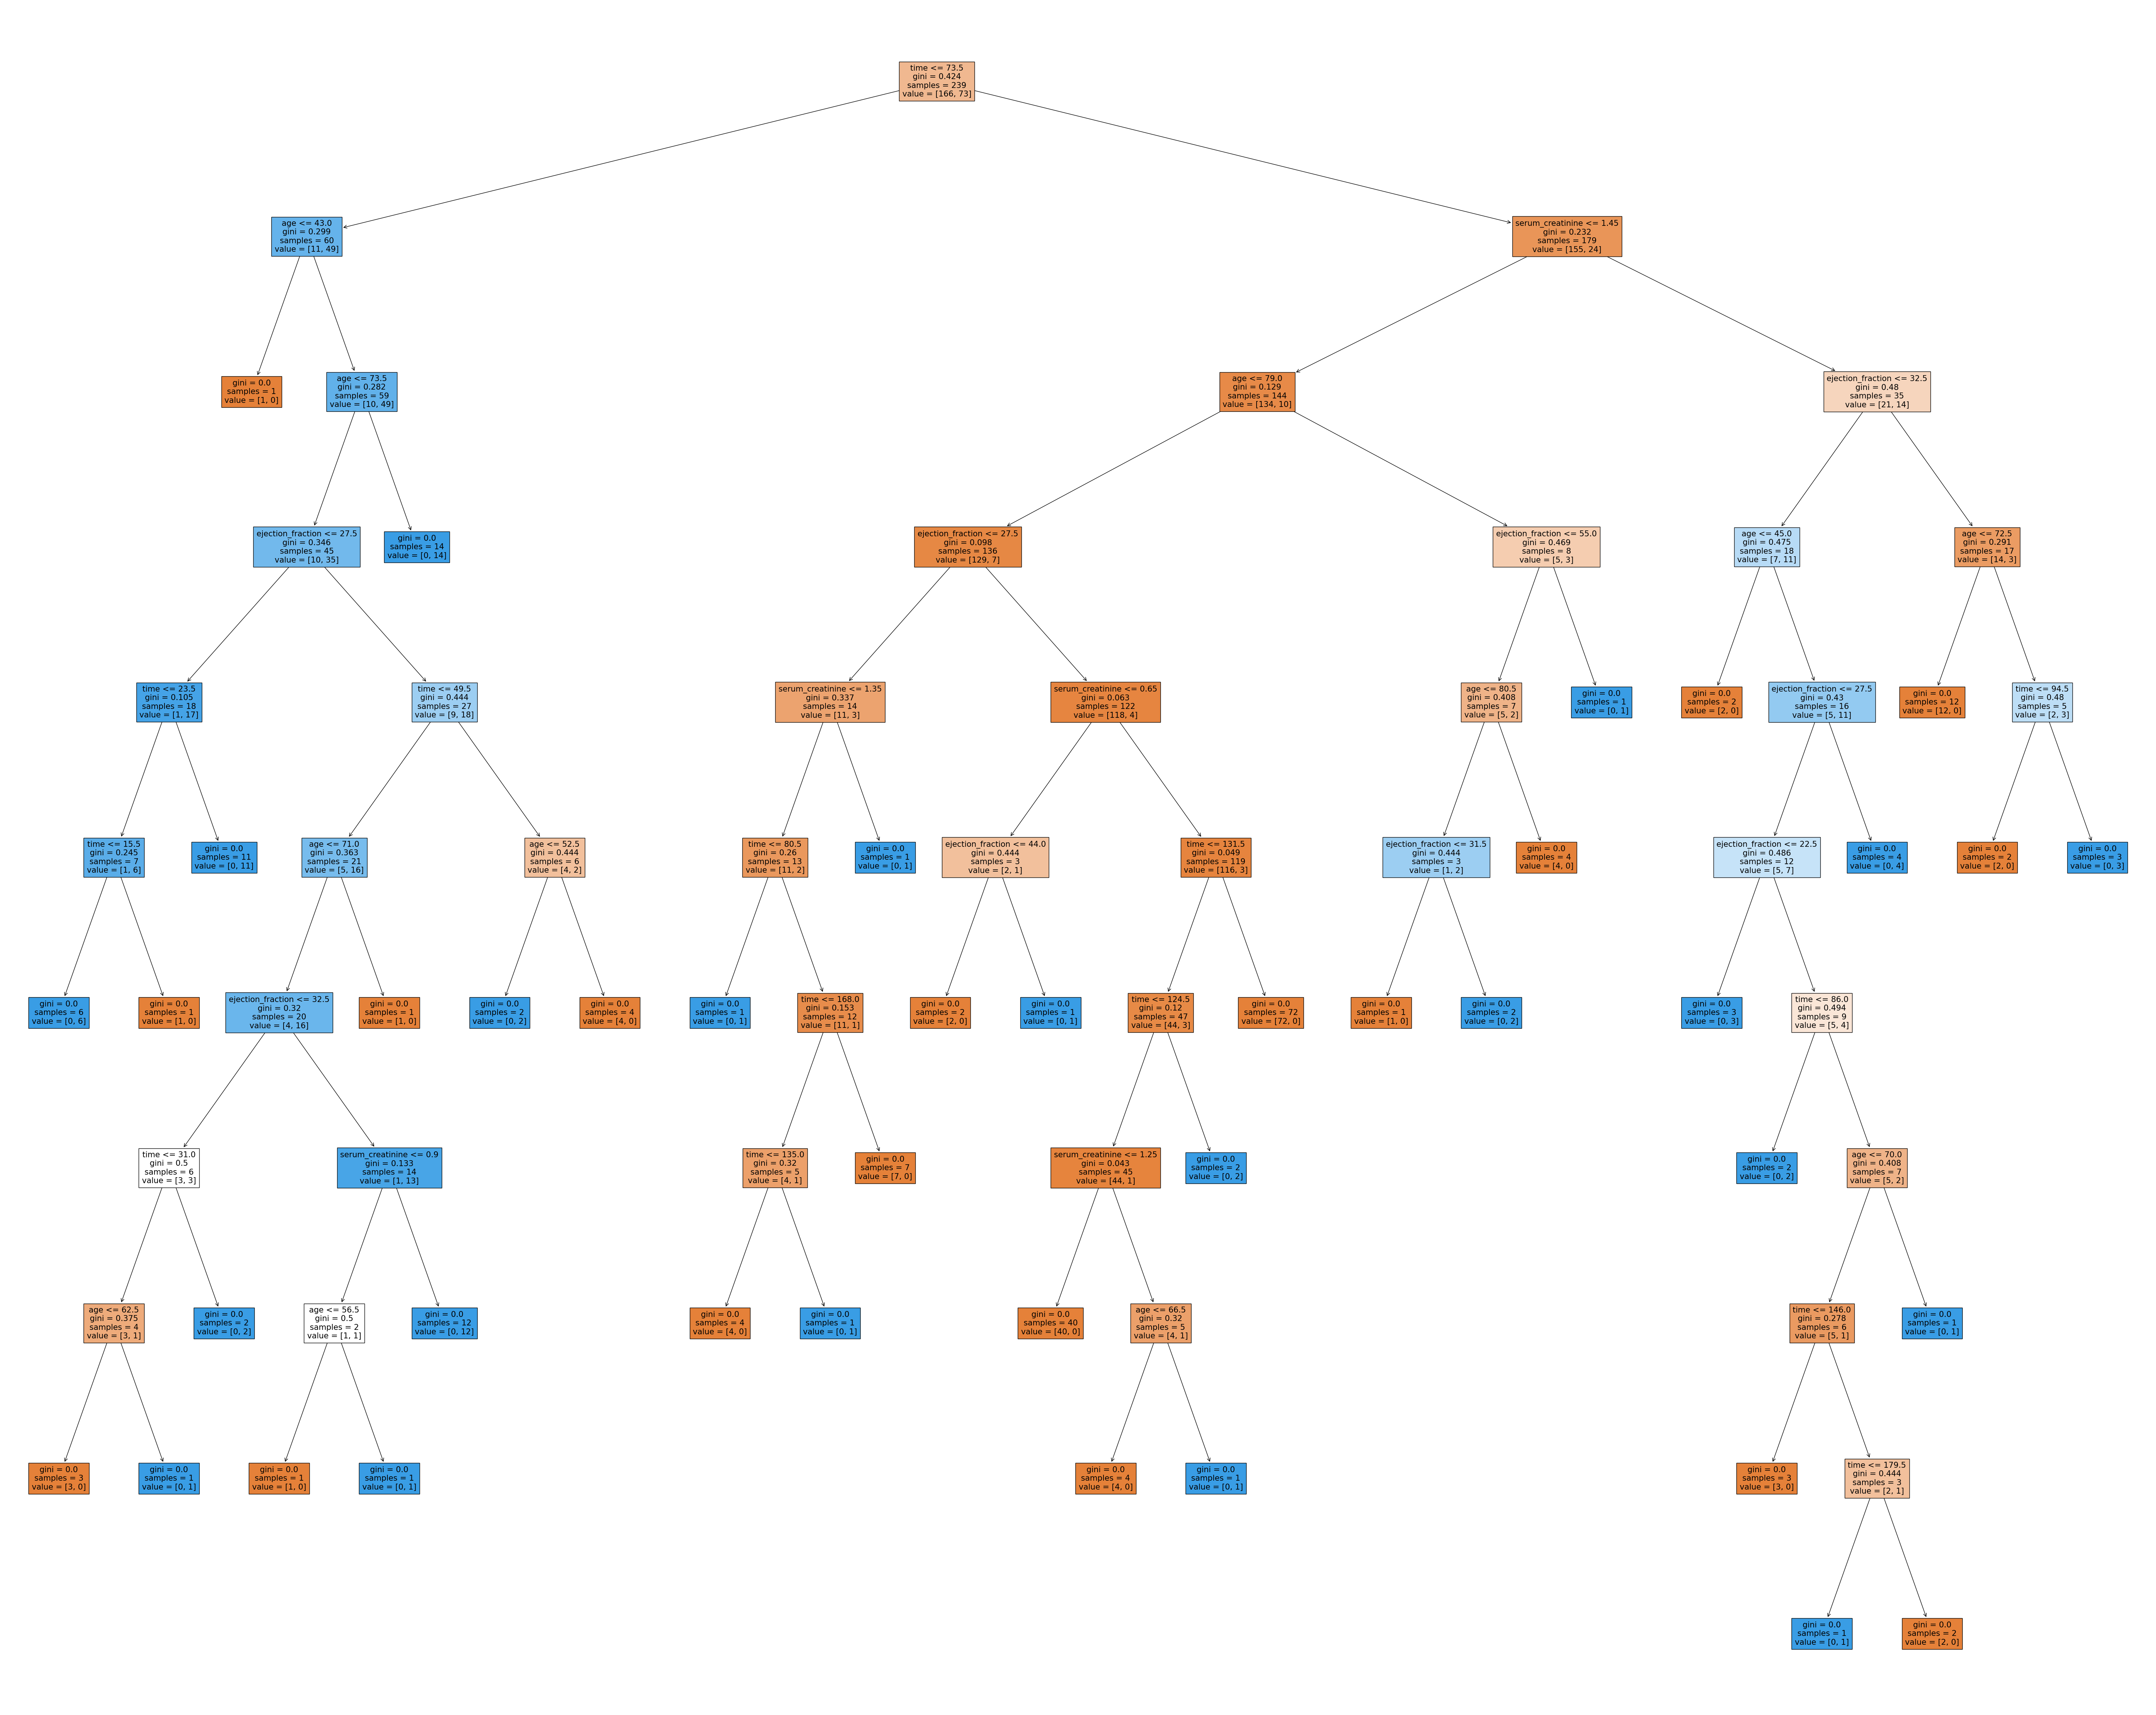

In [6]:
# plot the tree
fig = plt.figure(figsize=(75,60))
_ = tree.plot_tree(dtree, feature_names = 
                   ['age', 'ejection_fraction', 'serum_creatinine', 'time', 'Price per kg'], filled=True)

In [7]:
# make predictions
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

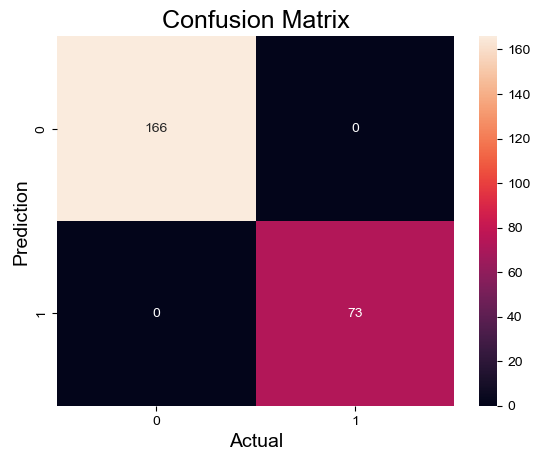

Accuracy   : 1.0


In [8]:
# show confusion matrix for training data

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_train,y_train_pred)

sns.heatmap(cm, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(15, 15)})
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy   :", accuracy)

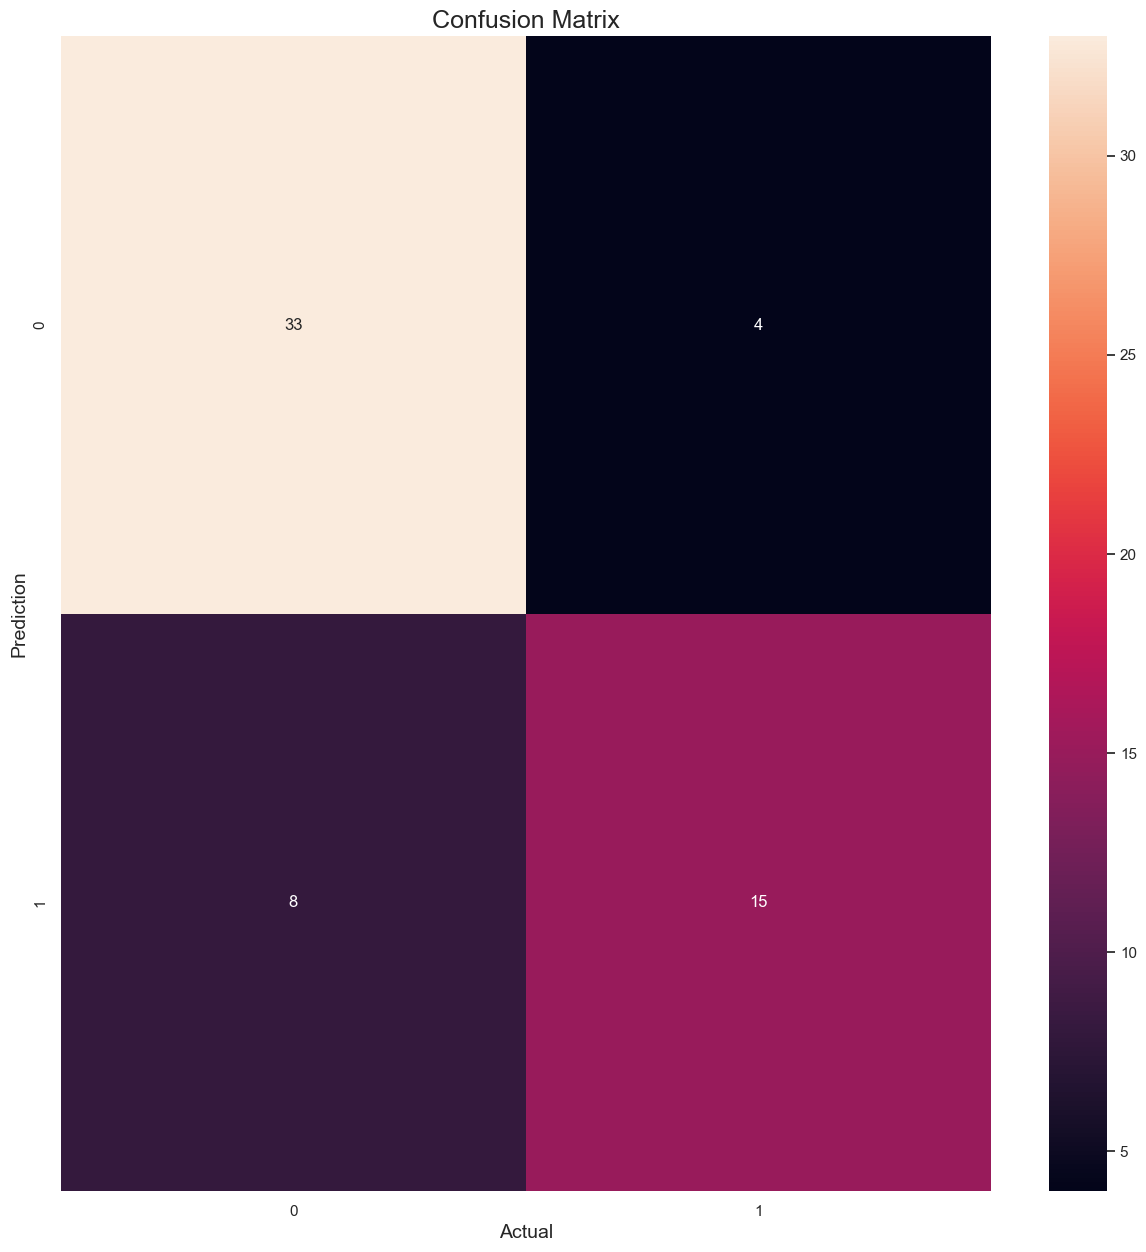

Accuracy   : 0.8


In [9]:
# show confusion matrix for testing data
cm = confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(15, 15)})
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy   :", accuracy)